In [1]:
import os
import sys
sys.path.append(os.path.relpath('code' ))
from analysis_helper_functions import *
import numpy as np

base_folder_dir_2 = 'data_strong_control'
folder_names_2 = os.listdir(base_folder_dir_2)
dict_of_folders_with_files_2 = dict()
for x in folder_names_2:
    if x != '.DS_Store':
        dict_of_folders_with_files_2[x] = create_dict_for_folder(base_folder_dir_2+'/' +x)

data_dict_2 = dict()
for x in dict_of_folders_with_files_2.keys():
    for y in dict_of_folders_with_files_2[x].keys():
        filename_2 = base_folder_dir_2+"/"+x + "/"+y
        with open(filename_2, 'rb') as files:
            data_dict_2[y] = [pickle.load(files) ,dict_of_folders_with_files_2[x][y]]    

base_folder_dir_3 = 'data_inversion'
folder_names_3 = os.listdir(base_folder_dir_3)
dict_of_folders_with_files_3 = dict()
for x in folder_names_3:
    if x != '.DS_Store':
        dict_of_folders_with_files_3[x] = create_dict_for_folder(base_folder_dir_3+'/' +x)

data_dict_3 = dict()
for x in dict_of_folders_with_files_3.keys():
    for y in dict_of_folders_with_files_3[x].keys():
        filename_3 = base_folder_dir_3+"/"+x + "/"+y
        with open(filename_3, 'rb') as files:
            data_dict_3[y] = [pickle.load(files) ,dict_of_folders_with_files_3[x][y]]            

In [2]:
def get_fig_data_from_dict(datadict,no_standard=False):
    times = datadict["parameters"]["times"]
    y_d,v_y_d,p_y_d,u_d = datadict["y_d_sol"],datadict["v_y_d_sol"],datadict["p_y_d_sol"],datadict["u_node_d_sol"]
    mu,nu = datadict["mu_sol"],datadict["nu_sol"]
    H_evo = datadict["H_control_sol"]
    conserved_I = p_y_d.transpose()[0,0]
    conserved_I = conserved_I.flatten()# = datadict["conserved_I"] # once it is stored remove this temporary fix
    if not no_standard:
        standard_q,standard_v = datadict["q_standard_sol"],datadict["v_standard_sol"]
        standard_Ua, standard_Ub = datadict["standard_Ua"], datadict["standard_Ub"]
        result = {"times":times,"y_d": y_d.transpose(), "v_y_d":v_y_d.transpose(), "p_y_d": p_y_d.transpose(), "u_d":u_d,"standard_U_a":standard_Ua,"standard_U_b":standard_Ub, "mu":mu,"nu":nu,"H_evo":H_evo.flatten(),"conserved_I":conserved_I,"standard_q":standard_q.transpose(),"standard_v":standard_v.transpose()}
    else:
        result ={"times":times,"y_d": y_d.transpose(), "v_y_d":v_y_d.transpose(), "p_y_d": p_y_d.transpose(), "u_d":u_d ,"mu":mu,"nu":nu,"H_evo":H_evo.flatten(),"conserved_I":conserved_I}

    return result    


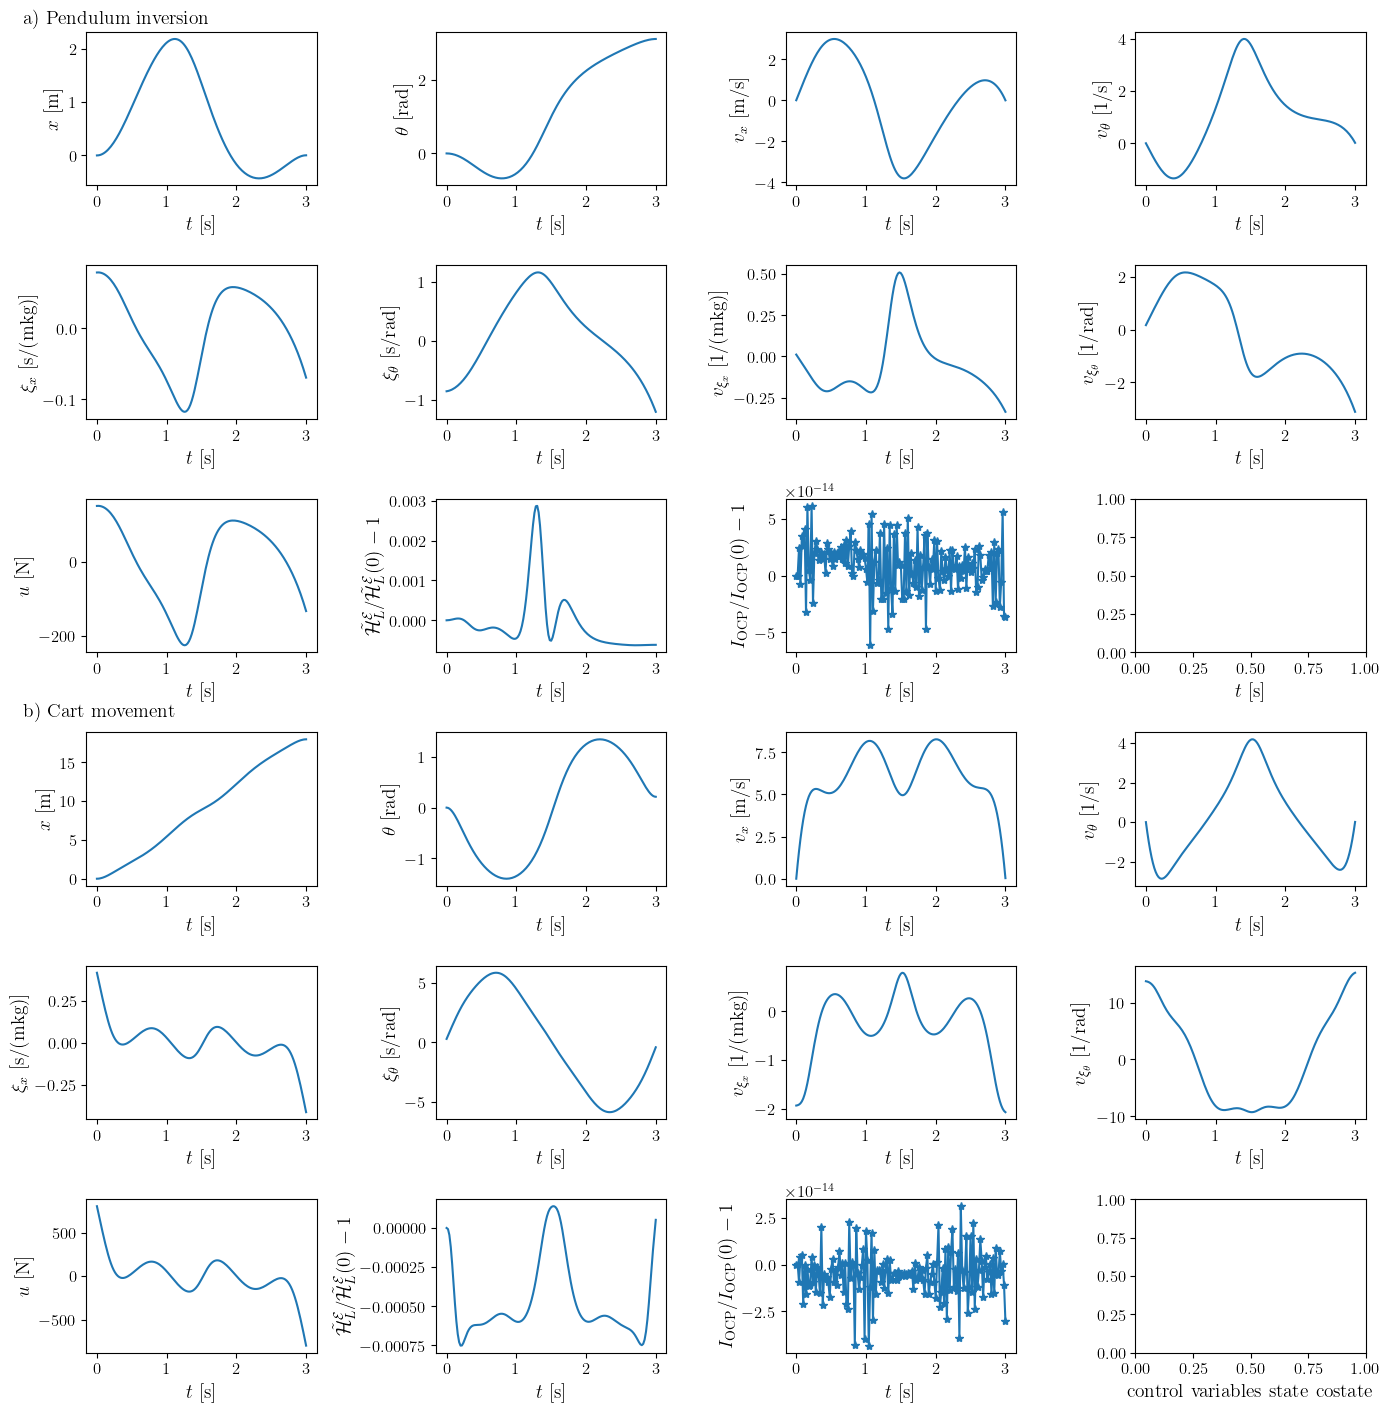

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "amsfont"
})
labelfont = 18
tickfont = 15
legendfont = 12

fig=plt.figure(figsize=(14, 14))
axs = [plt.subplot(6,4,i) for i in range(1,6*4+1)]
alpha_choice,beta_choice,gamma_choice = 0.5,0.5,0.5
# N_choice = 300
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
# loaded_dict_fig1_u = data_dict_3[file_name_u][0]
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)
# reference_H_0 = u_dep_fig1_data["H_evo"][0]

N_choice = 150
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"


loaded_dict_fig1_u = data_dict_3[file_name_u][0]
u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)


def plot_all_fig3(dict_data,style,label,axs,istart=0):
    axs[istart+0].plot(dict_data["times"],dict_data["y_d"][0],style,label=label)
    axs[istart+2].plot(dict_data["times"],dict_data["v_y_d"][0][0],style,label=label)
    axs[istart+8].plot(dict_data["times"],dict_data["u_d"],style,label=label)
    axs[istart+1].plot(dict_data["times"],dict_data["y_d"][1],style,label=label)
    axs[istart+3].plot(dict_data["times"],dict_data["v_y_d"][0][1],style,label=label)
    axs[istart+9].plot(dict_data["times"],(dict_data["H_evo"]-dict_data["H_evo"][0])/dict_data["H_evo"][0],style,label=label)
    # axs[istart+9].plot(dict_data["times"],dict_data["H_evo"]-dict_data["H_evo"][0],style,label=label)
    axs[istart+4].plot(dict_data["times"],dict_data["y_d"][2],style,label=label)
    axs[istart+6].plot(dict_data["times"],dict_data["v_y_d"][0][2],style,label=label)
    axs[istart+10].plot(dict_data["times"],(dict_data["p_y_d"][0][0]-dict_data["p_y_d"][0][0][0])/dict_data["p_y_d"][0][0][0],style+'*',label=label)
    axs[istart+5].plot(dict_data["times"],dict_data["y_d"][3],style,label=label)
    axs[istart+7].plot(dict_data["times"],dict_data["v_y_d"][0][3],style,label=label)
    axs[istart+0].set_ylabel(r'$x$ [m]',fontsize=labelfont)
    axs[istart+2].set_ylabel(r'$v_x$ [m/s]',fontsize=labelfont)
    axs[istart+10].set_ylabel(r'$I_\mathrm{OCP}/I_\mathrm{OCP}(0)-1$ ',fontsize=labelfont)
    axs[istart+8].set_ylabel(r'$u$ [N]',fontsize=labelfont)
    axs[istart+1].set_ylabel(r'$\theta$ [rad]',fontsize=labelfont)
    axs[istart+3].set_ylabel(r'$v_\theta$ [1/s]',fontsize=labelfont)
    axs[istart+9].set_ylabel(r'$\tilde{\mathcal{H}}_{L}^\mathcal{E}/ \tilde{\mathcal{H}}_{L}^\mathcal{E}(0)-1$ ',fontsize=labelfont)
    axs[istart+4].set_ylabel(r'$\xi_{x}$ [s/(mkg)]',fontsize=labelfont)
    axs[istart+6].set_ylabel(r'$v_{\xi_{x}}$ [1/(mkg)]',fontsize=labelfont)
    axs[istart+5].set_ylabel(r'$\xi_\theta$ [s/rad]',fontsize=labelfont)
    axs[istart+7].set_ylabel(r'$v_{\xi_\theta}$ [1/rad]',fontsize=labelfont)


style_1= '-'
labelfont = 14
tickfont = 12
label_1 = "reference" #str(loaded_dict_fig1_u["parameters"]["N"])
plot_all_fig3(u_dep_fig1_data,style_1,label_1,axs)
fig.text(0.02,0.995,f"a) Pendulum inversion",fontsize=labelfont)
fig.text(0.02,0.5,f"b) Cart movement",fontsize=labelfont)


# N_choice = 300
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
# loaded_dict_fig1_u = data_dict_2[file_name_u][0]
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)
# reference_H_0 = u_dep_fig1_data["H_evo"][0]

N_choice = 150
file_name_u_2 =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
loaded_dict_fig1_u_2 = data_dict_2[file_name_u_2][0]
u_dep_fig1_data_2 = get_fig_data_from_dict(loaded_dict_fig1_u_2)
plot_all_fig3(u_dep_fig1_data_2,style_1,label_1,axs,12)

for tmp in axs:
    tmp.tick_params(labelsize=tickfont)
    tmp.set_xlabel(r'$t$ [s]',fontsize=labelfont)
    txt = tmp.yaxis.get_offset_text()
    txt.set_fontsize(tickfont)
axs[-1].set_xlabel(r'state variables  costate')   
plt.tight_layout()
plt.savefig('figures/fig1_full_features.pdf',bbox_inches='tight')

# Paper figure creation

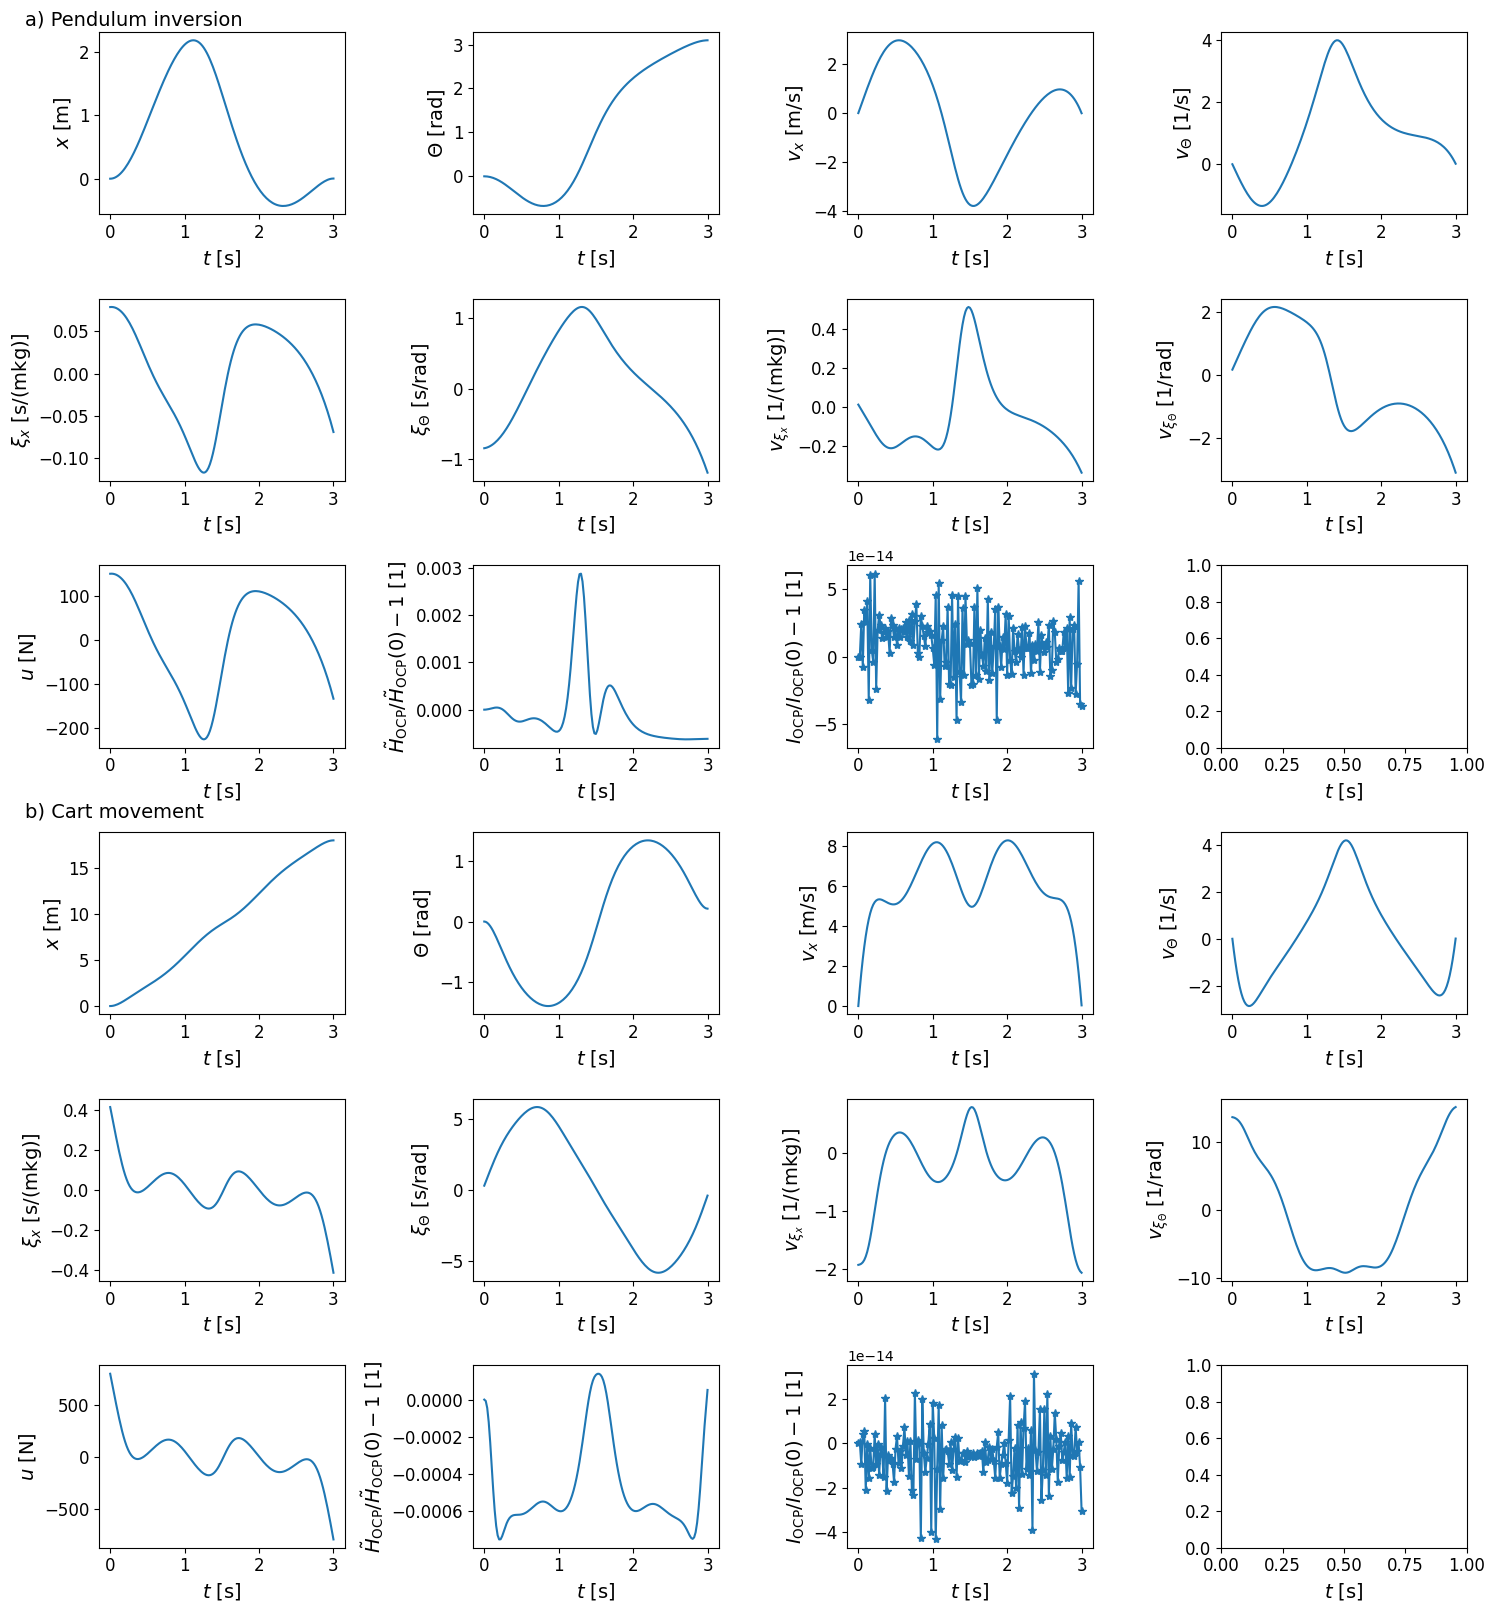

In [3]:
fig=plt.figure(figsize=(15, 16))
axs = [plt.subplot(6,4,i) for i in range(1,6*4+1)]
alpha_choice,beta_choice,gamma_choice = 0.5,0.5,0.5
N_choice = 300
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
loaded_dict_fig1_u = data_dict_3[file_name_u][0]
u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)
reference_H_0 = u_dep_fig1_data["H_evo"][0]

N_choice = 150
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"


loaded_dict_fig1_u = data_dict_3[file_name_u][0]
u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)


def plot_all_fig3(dict_data,style,label,axs,istart=0):
    axs[istart+0].plot(dict_data["times"],dict_data["y_d"][0],style,label=label)
    axs[istart+2].plot(dict_data["times"],dict_data["v_y_d"][0][0],style,label=label)
    axs[istart+8].plot(dict_data["times"],dict_data["u_d"],style,label=label)
    axs[istart+1].plot(dict_data["times"],dict_data["y_d"][1],style,label=label)
    axs[istart+3].plot(dict_data["times"],dict_data["v_y_d"][0][1],style,label=label)
    axs[istart+9].plot(dict_data["times"],(dict_data["H_evo"]-dict_data["H_evo"][0])/dict_data["H_evo"][0],style,label=label)
    # axs[istart+9].plot(dict_data["times"],dict_data["H_evo"]-dict_data["H_evo"][0],style,label=label)
    axs[istart+4].plot(dict_data["times"],dict_data["y_d"][2],style,label=label)
    axs[istart+6].plot(dict_data["times"],dict_data["v_y_d"][0][2],style,label=label)
    axs[istart+10].plot(dict_data["times"],(dict_data["p_y_d"][0][0]-dict_data["p_y_d"][0][0][0])/dict_data["p_y_d"][0][0][0],style+'*',label=label)
    axs[istart+5].plot(dict_data["times"],dict_data["y_d"][3],style,label=label)
    axs[istart+7].plot(dict_data["times"],dict_data["v_y_d"][0][3],style,label=label)
    axs[istart+0].set_ylabel(r'$x$ [m]',fontsize=labelfont)
    axs[istart+2].set_ylabel(r'$v_x$ [m/s]',fontsize=labelfont)
    axs[istart+10].set_ylabel(r'$I_\text{OCP}/I_\text{OCP}(0)-1$ [1]',fontsize=labelfont)
    axs[istart+8].set_ylabel(r'$u$ [N]',fontsize=labelfont)
    axs[istart+1].set_ylabel(r'$\Theta$ [rad]',fontsize=labelfont)
    axs[istart+3].set_ylabel(r'$v_\Theta$ [1/s]',fontsize=labelfont)
    axs[istart+9].set_ylabel(r'$\tilde{H}_\text{OCP}/ \tilde{H}_\text{OCP}(0)-1$ [1]',fontsize=labelfont)
    axs[istart+4].set_ylabel(r'$\xi_x$ [s/(mkg)]',fontsize=labelfont)
    axs[istart+6].set_ylabel(r'$v_{\xi_x}$ [1/(mkg)]',fontsize=labelfont)
    axs[istart+5].set_ylabel(r'$\xi_\Theta$ [s/rad]',fontsize=labelfont)
    axs[istart+7].set_ylabel(r'$v_{\xi_\Theta}$ [1/rad]',fontsize=labelfont)


style_1= '-'
labelfont = 14
tickfont = 12
label_1 = "reference" #str(loaded_dict_fig1_u["parameters"]["N"])
plot_all_fig3(u_dep_fig1_data,style_1,label_1,axs)
fig.text(0.02,0.995,f"a) Pendulum inversion",fontsize=labelfont)
fig.text(0.02,0.5,f"b) Cart movement",fontsize=labelfont)


N_choice = 300
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
loaded_dict_fig1_u = data_dict_2[file_name_u][0]
u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)
reference_H_0 = u_dep_fig1_data["H_evo"][0]

N_choice = 150
file_name_u_2 =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
loaded_dict_fig1_u_2 = data_dict_2[file_name_u_2][0]
u_dep_fig1_data_2 = get_fig_data_from_dict(loaded_dict_fig1_u_2)
plot_all_fig3(u_dep_fig1_data_2,style_1,label_1,axs,12)

for tmp in axs:
    tmp.tick_params(labelsize=tickfont)
    tmp.set_xlabel(r'$t$ [s]',fontsize=labelfont)
    
plt.tight_layout()
# plt.savefig('figures/fig1_full_features.pdf',bbox_inches='tight')

In [1]:
# import scipy
# fig=plt.figure(figsize=(15, 9))
# ax1 = plt.subplot(3,4,1)
# ax2 = plt.subplot(3,4,2)
# ax3 = plt.subplot(3,4,3)
# ax4 = plt.subplot(3,4,4)
# ax5 = plt.subplot(3,4,5)
# ax6 = plt.subplot(3,4,6)
# ax7 = plt.subplot(3,4,7)
# ax8 = plt.subplot(3,4,8)
# ax9 = plt.subplot(3,4,9)
# ax10 = plt.subplot(3,4,10)
# ax11 = plt.subplot(3,4,11)
# ax12 = plt.subplot(3,4,12)
# axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]

# alpha_choice,beta_choice,gamma_choice = 0.5,0.5,0.5
# N_choice = 300
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"

# loaded_dict_fig1_u = data_dict_3[file_name_u][0]
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)

# file_name_u_reference =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(300)+".pkl"
# loaded_dict_fig1_u_reference = data_dict_3[file_name_u_reference][0]
# u_dep_fig1_data_reference = get_fig_data_from_dict(loaded_dict_fig1_u_reference,True)

# def calc_reference_funcs(ref_dict):
#     ud_func = scipy.interpolate.CubicSpline(ref_dict["times"], ref_dict["u_d"].flatten()) 
#     xd_func = scipy.interpolate.CubicSpline(ref_dict["times"], ref_dict["y_d"][0].flatten()) 
#     phid_func = scipy.interpolate.CubicSpline(ref_dict["times"], ref_dict["y_d"][1].flatten()) 
#     xi_xd_func = scipy.interpolate.CubicSpline(ref_dict["times"], ref_dict["y_d"][2].flatten()) 
#     xi_phid_func = scipy.interpolate.CubicSpline(ref_dict["times"], ref_dict["y_d"][3].flatten()) 
#     return {"u_d":ud_func,"y_d":[xd_func,phid_func,xi_xd_func,xi_phid_func]}

# def plot_all_fig3(dict_data,style,label,axs,ref_dict,offset = 0):

#     reffuncs = calc_reference_funcs(ref_dict)
#     axs[0+offset].plot(dict_data["times"],dict_data["y_d"][0]-reffuncs["y_d"][0](dict_data["times"]),style,label=label)
#     axs[8+offset].plot(dict_data["times"],dict_data["u_d"].flatten()-reffuncs["u_d"](dict_data["times"]),style,label=label)
#     axs[1+offset].plot(dict_data["times"],dict_data["y_d"][1]-reffuncs["y_d"][1](dict_data["times"]),style,label=label)
#     axs[9+offset].plot(dict_data["times"],(dict_data["H_evo"]-ref_dict['H_evo'][0])/ref_dict['H_evo'][0],style,label=label)
#     axs[4+offset].plot(dict_data["times"],dict_data["y_d"][2]-reffuncs["y_d"][2](dict_data["times"]),style,label=label)
#     axs[5+offset].plot(dict_data["times"],dict_data["y_d"][3]-reffuncs["y_d"][3](dict_data["times"]),style,label=label)

# #pendulum inversion
# alpha_choice,beta_choice,gamma_choice = 1.,1.,1.
# N_choice = 250
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
# style_1 = '-'
# loaded_dict_fig1_u = data_dict_3[file_name_u][0]
# label_1 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)

# plot_all_fig3(u_dep_fig1_data,style_1,label_1,axs,u_dep_fig1_data_reference)

# alpha_choice,beta_choice,gamma_choice = 1.,1.,1.
# N_choice = 150
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
# style_2 = '--'
# loaded_dict_fig1_u = data_dict_3[file_name_u][0]
# label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)
# plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs,u_dep_fig1_data_reference)

# N_choice = 70
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
# style_2 = ':'
# loaded_dict_fig1_u = data_dict_3[file_name_u][0]
# label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)
# plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs,u_dep_fig1_data_reference)


# N_choice = 30
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
# style_2 = '-.'
# loaded_dict_fig1_u = data_dict_3[file_name_u][0]
# label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)
# plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs,u_dep_fig1_data_reference)


# # cart translation
# alpha_choice,beta_choice,gamma_choice = 0.5,0.5,0.5
# N_choice = 300
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"

# loaded_dict_fig1_u = data_dict_2[file_name_u][0]
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)

# file_name_u_reference =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(300)+".pkl"
# loaded_dict_fig1_u_reference = data_dict_2[file_name_u_reference][0]
# u_dep_fig1_data_reference = get_fig_data_from_dict(loaded_dict_fig1_u_reference,True)



# alpha_choice,beta_choice,gamma_choice = 1.,1.,1.
# style_1 = '-'
# N_choice = 250
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
# loaded_dict_fig1_u = data_dict_2[file_name_u][0]
# label_1 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)

# plot_all_fig3(u_dep_fig1_data,style_1,label_1,axs,u_dep_fig1_data_reference,2)

# alpha_choice,beta_choice,gamma_choice = 1.,1.,1.
# N_choice = 150
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
# loaded_dict_fig1_u = data_dict_2[file_name_u][0]
# style_2 = '--'
# label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)
# plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs,u_dep_fig1_data_reference,2)

# N_choice = 100
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
# loaded_dict_fig1_u = data_dict_2[file_name_u][0]
# style_2 = ':'
# label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)
# plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs,u_dep_fig1_data_reference,2)

# N_choice = 70
# file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"g="+str(gamma_choice)+"N="+str(N_choice)+".pkl"
# loaded_dict_fig1_u = data_dict_2[file_name_u][0]
# style_2 = '-.'
# label_2 = str(loaded_dict_fig1_u["parameters"]["N"])
# u_dep_fig1_data = get_fig_data_from_dict(loaded_dict_fig1_u,True)
# plot_all_fig3(u_dep_fig1_data,style_2,label_2,axs,u_dep_fig1_data_reference,2)

# fig.text(0.02,0.989,f"a) Pendulum inversion",fontsize=labelfont)
# fig.text(0.52,0.989,f"b) Cart movement",fontsize=labelfont)

# axs[0].set_ylabel(r'$\Delta x$ [m]',fontsize=labelfont)
# axs[8].set_ylabel(r'$\Delta u$ [N]',fontsize=labelfont)
# axs[1].set_ylabel(r'$\Delta \Theta$ [rad]',fontsize=labelfont)
# axs[9].set_ylabel(r'$\Delta \tilde{H}_\text{OCP}/\tilde{H}_\text{OCP}^\text{ref}$ [1]',fontsize=labelfont)
# axs[4].set_ylabel(r'$\Delta \xi_x$ [s/(mkg)]',fontsize=labelfont)
# axs[5].set_ylabel(r'$\Delta \xi_\Theta$ [s/rad]',fontsize=labelfont)
# axs[2].set_ylabel(r'$\Delta x$ [m]',fontsize=labelfont)
# axs[8+2].set_ylabel(r'$\Delta u$ [N]',fontsize=labelfont)
# axs[1+2].set_ylabel(r'$\Delta \Theta$ [rad]',fontsize=labelfont)
# axs[9+2].set_ylabel(r'$\Delta \tilde{H}_\text{OCP}/\tilde{H}_\text{OCP}^\text{ref}$ [1]',fontsize=labelfont)
# axs[4+2].set_ylabel(r'$\Delta \xi_x$ [s/(mkg)]',fontsize=labelfont)
# axs[5+2].set_ylabel(r'$\Delta \xi_\Theta$ [s/rad]',fontsize=labelfont)

# axs[0].legend(title="N",fontsize=tickfont)
# axs[3].legend(title="N",fontsize=tickfont)


# for tmp in axs:
#     tmp.tick_params(labelsize=tickfont)
#     tmp.set_xlabel(r'$t$ [s]',fontsize=labelfont)
    
# plt.tight_layout()
# plt.savefig('figures/fig_3_all_double.pdf',bbox_inches='tight')